In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from skimage.io import imshow
from datetime import datetime

import vgg16_
import utils

imageNUM = 3
data_loc = os.path.join('TestImage')

In [2]:
'''
img1 = utils.load_image2(os.path.join(data_loc,'snake1.jpg'),224,224)
img2 = utils.load_image2(os.path.join(data_loc,'snake2.jpg'),224,224)
img3 = utils.load_image2(os.path.join(data_loc,'snake3.jpg'),224,224)
'''

img1 = utils.load_image(os.path.join(data_loc,'snake1.jpg'))
img2 = utils.load_image(os.path.join(data_loc,'snake2.jpg'))
img3 = utils.load_image(os.path.join(data_loc,'snake3.jpg'))

batch1 = img1.reshape((1, 224, 224, 3))
batch2 = img2.reshape((1, 224, 224, 3))
batch3 = img3.reshape((1, 224, 224, 3))
batch = np.concatenate((batch1, batch2, batch3), 0)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
C:\ProgramData\Anaconda3\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [3]:
def image_print(fig, i, img, name):
    #add column for print input images
    ax = fig.add_subplot(1, imageNUM, 1 + i, xticks=[], yticks=[])
    #add title that is probable name of type
    ax.set_title(name)
    plt.imshow(img)

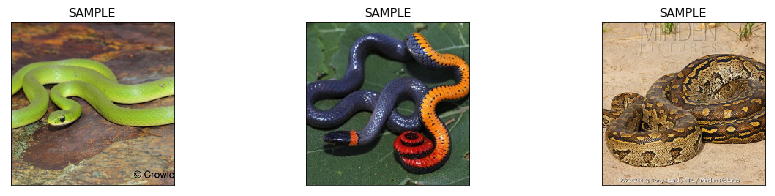

In [4]:
fig = plt.figure(figsize=(15,imageNUM))
image_print(fig,0,img1,"SAMPLE")
image_print(fig,1,img2,"SAMPLE")
image_print(fig,2,img3,"SAMPLE")

program is started
C:\Users\koo\jupyterNotebook\vgg\vgg16.npy
npy file loaded
build model started
build model finished: 13s
2018-07-25 17:34:52.295841  Running starts!
2018-07-25 17:35:29.784986  Running finished!
-img.close
[[1.5683843e-10 5.6694767e-11 8.1554824e-12 ... 2.0149413e-09
  1.1844439e-09 5.4769356e-10]
 [4.1940193e-15 2.2258599e-11 5.5635088e-16 ... 7.1991964e-15
  1.1838589e-13 9.8114518e-13]
 [1.6849116e-11 1.6350467e-13 7.2814103e-15 ... 6.6176342e-11
  2.7673187e-12 1.9115850e-13]]
-------------------- First Image --------------------
('Top1: ', 'n01729977 green snake, grass snake', '0.666')
('Top5: ', [('n01729977 green snake, grass snake', '0.666'), ('n01749939 green mamba', '0.220'), ('n01740131 night snake, Hypsiglena torquata', '0.082'), ('n01739381 vine snake', '0.030'), ('n01728572 thunder snake, worm snake, Carphophis amoenus', '0.001')])
-------------------- Second Image --------------------
('Top1: ', 'n01728920 ringneck snake, ring-necked snake, ring snake'

<Figure size 1440x216 with 0 Axes>

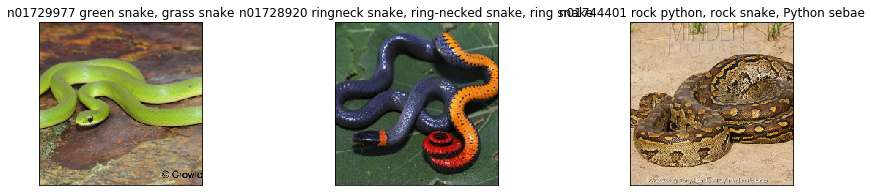

In [5]:
#with tf.device('/gpu:0'):
#with tf.device('/cpu:0'):
with tf.Session(config=tf.ConfigProto(gpu_options=(tf.GPUOptions(per_process_gpu_memory_fraction=0.8)))) as sess:
#with tf.Session() as sess:
        print('program is started')
        images = tf.placeholder("float", [imageNUM, 224, 224, 3])
        feed_dict = {images: batch}
        
        figure = plt.figure(figsize=(20,imageNUM))
        vgg = vgg16_.Vgg16(fig = figure)


        with tf.name_scope("content_vgg"):
            vgg.build(images)
             
        merged = tf.summary.merge_all()
        filter_img = tf.summary.FileWriter(os.path.join('filter'))
        
        print(datetime.now(),' Running starts!')
        mer, prob = sess.run([merged, vgg.prob], feed_dict=feed_dict)
        print(datetime.now(),' Running finished!')
        filter_img.add_summary(mer, 0)
        print('-img.close')
        filter_img.close()

        print(prob)
        print('-'* 20,'First Image','-'*20)
        name1 = utils.print_prob(prob[0], './synset.txt')
        print('-'* 20,'Second Image','-'*20)
        name2 = utils.print_prob(prob[1], './synset.txt')
        print('-'* 20,'Third Image','-'*20)
        name3 = utils.print_prob(prob[2], './synset.txt')
        print('-'* 50)        
        fig = plt.figure(figsize=(15,imageNUM))
        image_print(fig, 0, img1, name1)
        image_print(fig, 1, img2, name2)
        image_print(fig, 2, img3, name3)      
        #plt.show()